# Sample Pandas and Plotting Notebook

## Part 1 (Pandas)

Load dataset and print basic information.

In [1]:
import pandas as pd
import numpy as np

savings_df = pd.read_csv(
    'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv',
    parse_dates=['Effective Date']
)
savings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Company Name                               450 non-null    object        
 1   company contact                            450 non-null    object        
 2   company email                              433 non-null    object        
 3   company phone                              450 non-null    object        
 4   Address                                    450 non-null    object        
 5   City                                       450 non-null    object        
 6   State                                      450 non-null    object        
 7   Postcode                                   450 non-null    int64         
 8   Industry                                   450 non-null    object        
 9   Industry descr       

Print unique entries for columns where practical.

In [2]:
for col in savings_df.columns:
    if savings_df[col].nunique() < 50:
        print(f'{col}:')
        print(savings_df[col].sort_values().unique())

City:
['Astoria' 'BRONX' 'BROOKLYN' 'BROOKLYN HEIGHT' 'Bronx' 'Bronx,' 'Brookln'
 'Brooklym' 'Brooklyn' 'Brooklyn,' 'COLLEGE POINT' 'College Point'
 'Far Rockaway' 'Flushing' 'Forest Hills' 'GLENDALE' 'INWOOD' 'Jamaica'
 'L.I.C.' 'LONG ISLAND CITY' 'Lond Island City' 'Long Island City'
 'Maspeth' 'NEW YORK' 'NY' 'New YOrk' 'New York' 'Ozone Park'
 'PORT MORRIS' 'QUEENS' 'Queens' 'Queens Village' 'RIDGEWOOD' 'Ridgewood'
 'Springfield Gardens' 'Staten Island' 'Woodside' 'bronx']
State:
['NY']
Industry:
['Commercial' 'Landlord' 'Manufacturing' 'Other'
 'Wholesale/Warehouse/Distribution']
Company Type:
['ECSP' 'LMEP']
Job created:
[ 2.  3.  5. 10. 12. 15. 20. 60. nan]
Job retain:
[   4.    5.    6.   14.   20.   23.   30.   54.   82.  187.  260.  462.
 2964.   nan]
Borough:
['Bronx' 'Brooklyn' 'New York' 'Queens' 'Staten Island']
Community Board:
[101. 102. 104. 105. 109. 110. 111. 112. 201. 202. 203. 204. 206. 207.
 209. 210. 211. 212. 301. 302. 303. 304. 305. 306. 307. 308. 309. 311.
 31

In [3]:
# Clean 'City' names
city_name_map = {
    'Astoria': 'Astoria',
    'Bronx': 'Bronx',
    'Brook': 'Brooklyn',
    'College': 'College Point',
    'Far': 'Far Rockaway',
    'Flushing': 'Flushing',
    'Forest': 'Forest Hills',
    'Glendale': 'Glendale',
    'Inwood': 'Inwood',
    'Jamaica': 'Jamaica',
    'L.I.C.': 'Long Island City',
    'Long': 'Long Island City',
    'Maspeth': 'Maspeth',
    'Ny': 'New York',
    'New': 'New York',
    'Ozone Park': 'Ozone Park',
    'Port Morris': 'Port Morris',
    # Queens done seperatly to not overwrite queens village
    'Queens Village': 'Queens Village',
    'Ridgewood': 'Ridgewood',
    'Springfield Gardens': 'Springfield Gardens',
    'Staten Island': 'Staten Island',
    'Woodside': 'Woodside',
}

savings_df.loc[savings_df['City'].str.title() == 'Queens', 'City'] = 'Queens'

for other, correct in city_name_map.items():
    savings_df.loc[savings_df['City'].str.title().str.startswith(other), 'City'] = correct

savings_df['City'].sort_values().unique()

array(['Astoria', 'Bronx', 'Brooklyn', 'College Point', 'Far Rockaway',
       'Flushing', 'Forest Hills', 'Glendale', 'Inwood', 'Jamaica',
       'Lond Island City', 'Long Island City', 'Maspeth', 'New York',
       'Ozone Park', 'Port Morris', 'Queens', 'Queens Village',
       'Ridgewood', 'Springfield Gardens', 'Staten Island', 'Woodside'],
      dtype=object)

### 1. How many different companies are represented in the data set?

In [4]:
unique_company_savings_df = savings_df.drop_duplicates(
    ['Company Name', 'company contact', 'company email', 'company phone']
)
len(unique_company_savings_df)

439

### 2. What is the total number of jobs created for businesses in Queens?

In [5]:
new_jobs_queens_city = savings_df['Job created'][
    savings_df['City'].str.title().str.startswith('Queens')
].sum()
print(f'Total number of jobs created for buisnesses in Queens (City): {new_jobs_queens_city}')

new_jobs_queens_borough = savings_df['Job created'][
    savings_df['Borough'].str.title().str.startswith('Queens')
].sum()
print(f'Total number of jobs created for buisnesses in Queens (Borough): {new_jobs_queens_borough}')

Total number of jobs created for buisnesses in Queens (City): 90.0
Total number of jobs created for buisnesses in Queens (Borough): 102.0


### 3. How many different unique email domains names are there in the data set?

In [6]:
valid_emails = savings_df['company email'].dropna()
valid_emails = valid_emails[valid_emails.str.contains('@')]
valid_emails = valid_emails[valid_emails.str.contains('.')]
valid_emails.str.split('@').str[-1].str.split('.').str[:-1].str.join('.').nunique()

356

### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 

In [7]:
nta_df = savings_df[savings_df.groupby('NTA')['NTA'].transform('count') >= 5]

# Mean (Total) Savings
nta_summary = nta_df.groupby('NTA')['Total Savings'].agg(['mean'])
nta_summary.columns = ['Mean Savings']

# Total Jobs
nta_summary['Total Jobs Created'] = nta_df.groupby('NTA')['Job created'].agg(
    lambda x: np.nan if np.all(np.isnan(x)) else np.nansum(x)
)

nta_summary

,Mean Savings,Total Jobs Created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,NaN
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
College Point,17159.372857,2.0
Crown Heights North,4036.298889,NaN
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN
East New York,48433.093333,15.0
East Williamsburg,13990.626364,NaN
Greenpoint,9753.649286,NaN


### 5. Save your result for the previous question as a CSV file

In [8]:
nta_summary.to_csv('nta_summary.csv')

## Part 2 (Plotting)

### Jobs Created vs. Average Savings

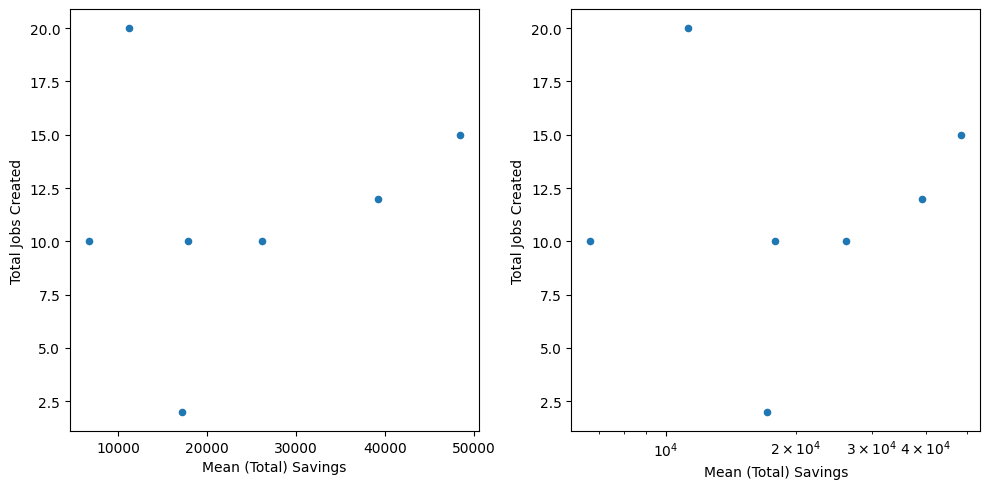

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

nta_summary.plot.scatter(x='Mean Savings', y='Total Jobs Created', ax=axs[0])
nta_summary.plot.scatter(x='Mean Savings', y='Total Jobs Created', ax=axs[1])
axs[1].set_xscale('log')
axs[0].set_xlabel('Mean (Total) Savings')
axs[1].set_xlabel('Mean (Total) Savings')
plt.tight_layout()

### Histogram of the log of the average total savings

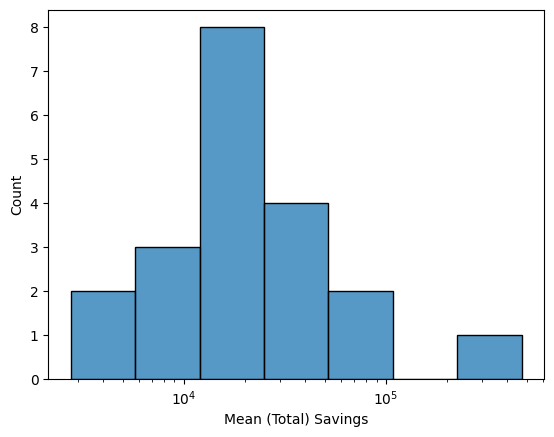

In [10]:
sns.histplot(nta_summary, x='Mean Savings', log_scale=True)
plt.xlabel('Mean (Total) Savings');

### Line plot of the total jobs created for each month

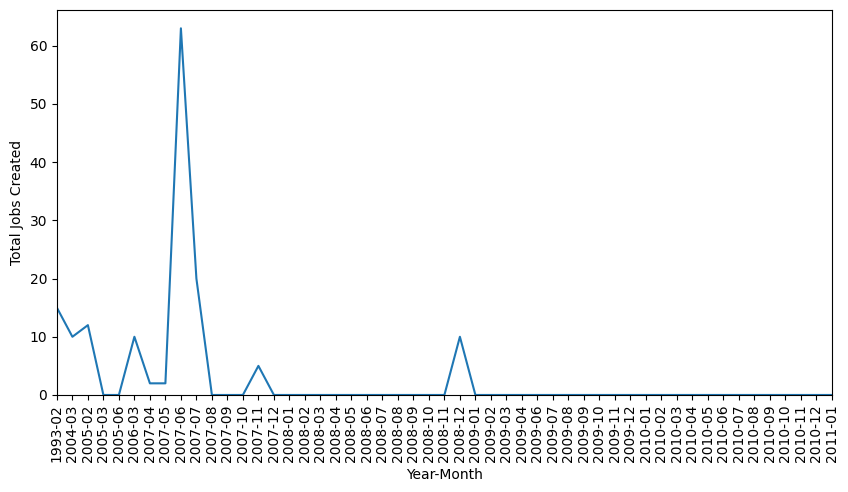

In [11]:
# Year conscious
savings_df['year_month'] = savings_df['Effective Date'].dt.to_period('M').astype(str)
jobs_per_month = savings_df.groupby('year_month')['Job created'].agg('sum')

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(jobs_per_month)

plt.xlim(left=0, right=50)
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Total Jobs Created');

Note that the x-axis is not continuous. The first entry is from 1993 and might well be an error. Further after 2007, there is only one month with reported created jobs.

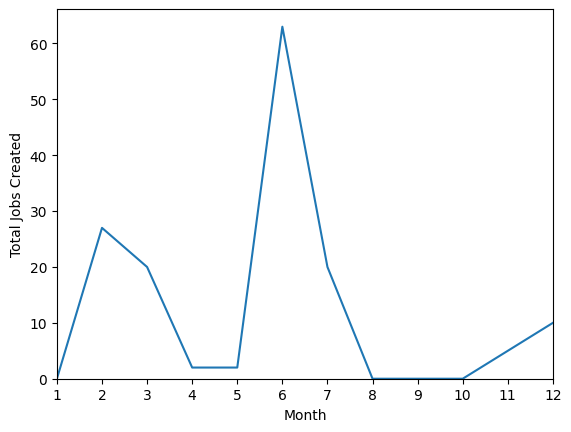

In [12]:
# Year agnostic
jobs_per_month = savings_df.groupby(savings_df['Effective Date'].dt.month)['Job created'].agg('sum')
sns.lineplot(jobs_per_month)
plt.xlim(left=1, right=12)
plt.ylim(bottom=0)
plt.xticks(np.arange(1, 13))
plt.xlabel('Month')
plt.ylabel('Total Jobs Created');